In [17]:
# For running inference on the TF-Hub module.
import tensorflow as tf

import tensorflow_hub as hub

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from PIL import Image

import numpy as np

In [18]:
# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())

The following GPU devices are available: /device:GPU:0


In [19]:
# Get model to use
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"
detector = hub.load(module_handle).signatures['default']


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [20]:
image_uri = "images/intersection.jpg"

image = Image.open(image_uri)

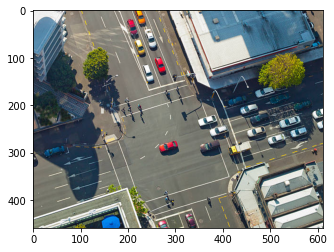

In [21]:
# Show image in cv2
plt.imshow(image)
plt.show()

In [22]:
# Convert to tensor
image_raw_tensor = tf.io.read_file(image_uri)

# Parse jpeg image into uint8 tensor
image_decoded = tf.image.decode_jpeg(image_raw_tensor, channels=3)

In [23]:
# Convert image datatype from uint8 to float32
image_converted = tf.image.convert_image_dtype(image_decoded, tf.float32)[tf.newaxis, ...]

# Run image through model
result = detector(image_converted)

# Convert result values to numpy values
result = { key: value.numpy() for key, value in result.items() }

In [24]:
# Detection boxes
detection_boxes = result["detection_boxes"]
detection_boxes.shape

(100, 4)

In [25]:
# Detection classes
detection_class_entities = result["detection_class_entities"]
detection_class_entities.shape

(100,)

In [26]:
# Detection scores
detection_scores = result["detection_scores"]
detection_scores.shape

(100,)

Vehicle: 72%
Tree: 57%
Building: 54%
Vehicle: 52%
Vehicle: 51%
Vehicle: 49%
Person: 48%
Vehicle: 47%
Vehicle: 45%
Person: 41%
Vehicle: 40%
Tree: 40%
Person: 38%
Vehicle: 33%
Building: 30%
Car: 26%
Land vehicle: 26%
Person: 25%
Land vehicle: 25%
Person: 22%
Vehicle: 22%
Vehicle: 22%
Vehicle: 21%
Land vehicle: 20%
Car: 20%


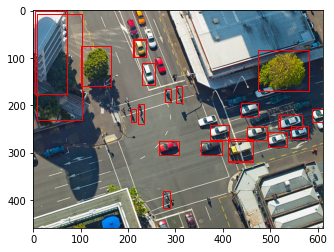

In [30]:
# Create figure and axes
fig, ax = plt.subplots()

# Draw image
ax.imshow(image)

img = image_decoded.numpy()

img_width = img.shape[1]
img_height = img.shape[0]

# For each bo
for i in range(detection_boxes.shape[0]):
    if detection_scores[i] > 0.20:
        ymin, xmin, ymax, xmax = tuple(detection_boxes[i])

        class_name = detection_class_entities[i].decode("ascii")
        score = int(detection_scores[i] * 100)

        title_string = "{}: {}%".format(class_name, score)
        print(title_string)

        x1 = xmin * img_width
        y1 = ymin * img_height

        x2 = xmax * img_width
        y2 = ymax * img_height

        # Create rectangle
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')

        # Add rect to axes
        ax.add_patch(rect)

# Show plot
plt.show()